<a href="https://colab.research.google.com/github/Foysal348/Phitron-Assignment/blob/main/MD_FOYSAL_EMON_SHANTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Email:210122.cse@student.just.edu.bd

# Module 05, 06 & 07 Assignment
## Understanding the ML Problem, Exploratory Data Analysis (EDA) and Basic Preprocessing
**Dataset:** Titanic – Machine Learning from Disaster (Kaggle)

Download the **train.csv** file from Kaggle’s Titanic competition and upload it to this notebook. Rename it to `titanic.csv` or update the file name in the loading cell.
Dataset link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

Total Marks: **100**

### Instructions
- This assignment covers:
  - **Module 05:** Basic ML problem framing (features, target, task type).
  - **Module 06:** Exploratory Data Analysis (EDA).
  - **Module 07:** Basic Preprocessing (handling missing values, encoding, scaling).
- Answer all questions inside this notebook using code and markdown.
- Do not delete the original question texts.
- At the end, the notebook should run from top to bottom without errors.

In [ ]:
# ==============================
# Setup
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("Libraries imported.")

Libraries imported.


---
## Part 0: Understanding the ML Problem (Module 05) – 10 marks

### 0.1 Load the Dataset and Inspect (5 marks)
**Tasks:**
1. Load `titanic.csv` into a pandas DataFrame.
2. Show `.head()`, `.info()`, and `.describe()`.
3. Briefly look at the column names and data types.


In [ ]:
# 0.1 Load the Dataset and Inspect
from google.colab import drive
drive.mount('/content/drive')
# TODO: Change file name if needed.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv")#Download the .csv file from Kaggle

print("Shape of dataset:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
display(df.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe (numeric columns):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 0.2 Identify Features, Target and Task Type (5 marks)
**Tasks:**
Based on the dataset:
1. Identify the **target variable** for a predictive model.
2. List at least **5 potential feature columns** you could use.
3. State whether this is a **classification** or **regression** problem, and explain **why**.

Write your answers below.


#### **Your answers**
- Target variable: Survived
- Feature columns (at least 5): Age,Sex,SibSp,Survived,Pclass,Fare
- Is this classification or regression, and why?:  Classification.Here "Servived" is the target variable which contains binary values that why it is a binary classification problem.

---
## Part A: Exploratory Data Analysis (EDA) – 45 marks

### 1. Initial Exploration and Cleaning Decisions (10 marks)
**Tasks:**
1. Show the number of unique values in each column.
2. Identify columns that are clearly **IDs or high-cardinality text** (for example, `PassengerId`, `Name`, `Ticket`).
3. Decide which of these columns you will **drop** for the rest of the analysis and justify in 2–3 sentences.


In [ ]:
# 1. Initial Exploration and Cleaning Decisions (Task 1 is given)
print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

Unique values per column:
PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


#### Columns to drop and justification
- Columns dropped: "Cabin"  
- Justification (2–3 sentences):I will drop the "Cabin" column.Because,more than 80% values are missing from this column. When we see atleast 30-50% value are missing from a column ,then we decide to drop the column.

---
### 2. Univariate Analysis (15 marks)
**Tasks:**
- Plot histograms for numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot countplots for categorical features: `Sex`, `Pclass`, `Embarked`.
- Write **two to three insights** about the distributions and any obvious patterns.


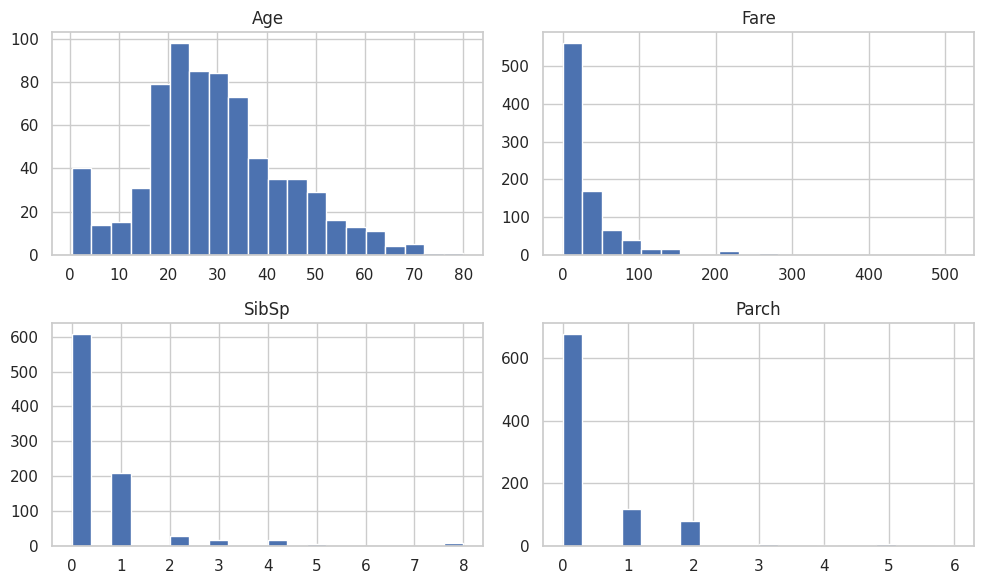

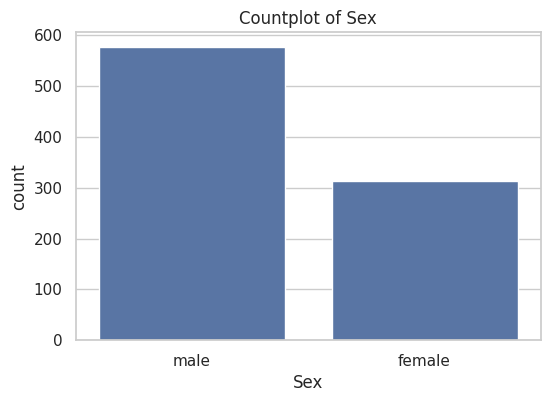

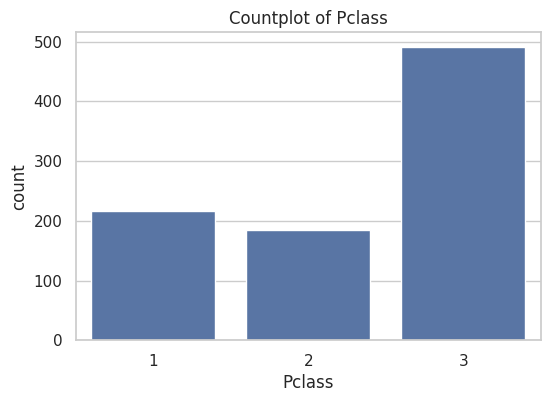

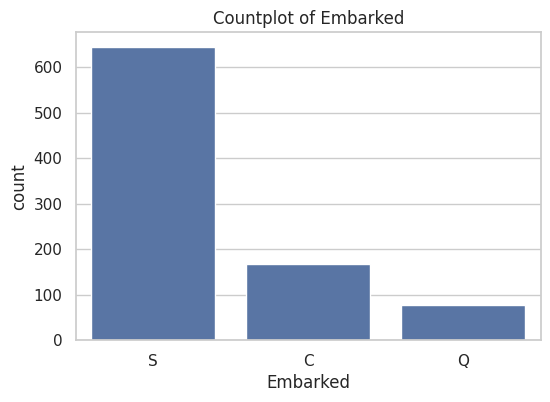

In [ ]:
# 2. Univariate Analysis

numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Histograms code is written for you
df[numeric_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Write Countplots code for key categorical variables [You need to complete]
cat_cols = ["Sex", "Pclass", "Embarked"]
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=0)

#### Write Your insights
- Insight 1:From the histogram, we see that "Age", "Fare", "SibSp", and "Parch" all the four feature are a right-skewed distribution.For "Age" ,the range of majority  passengers between 20 to 30.From "SibSp" ,we see that most of the passengers not with brother/sister or husband/wife.
- Insight 2:From the count plot of the "Sex" feature, we see that the majority of passengers are male, around 600, where females are around half of the males.
- Insight 3:From the plot of "Pclass" feature, we see that the majority choose  Class 3(Low Class) around 600, where Class 2(Mid Class) and Class 1(Rich Class) passenger's individually not above 220.

---
### 3. Bivariate Analysis with Target (15 marks)
Use `Survived` as the target variable.

**Tasks:**
- Compute and plot a **correlation heatmap** for numeric features, including `Survived`.
- Create a **pairplot** for: `Age`, `Fare`, `SibSp`, `Parch`, and `Survived`.
- Write **two to three insights**, including which variables seem associated with survival.


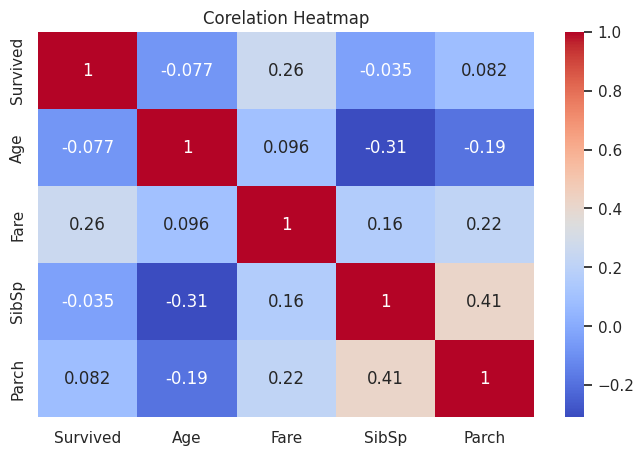

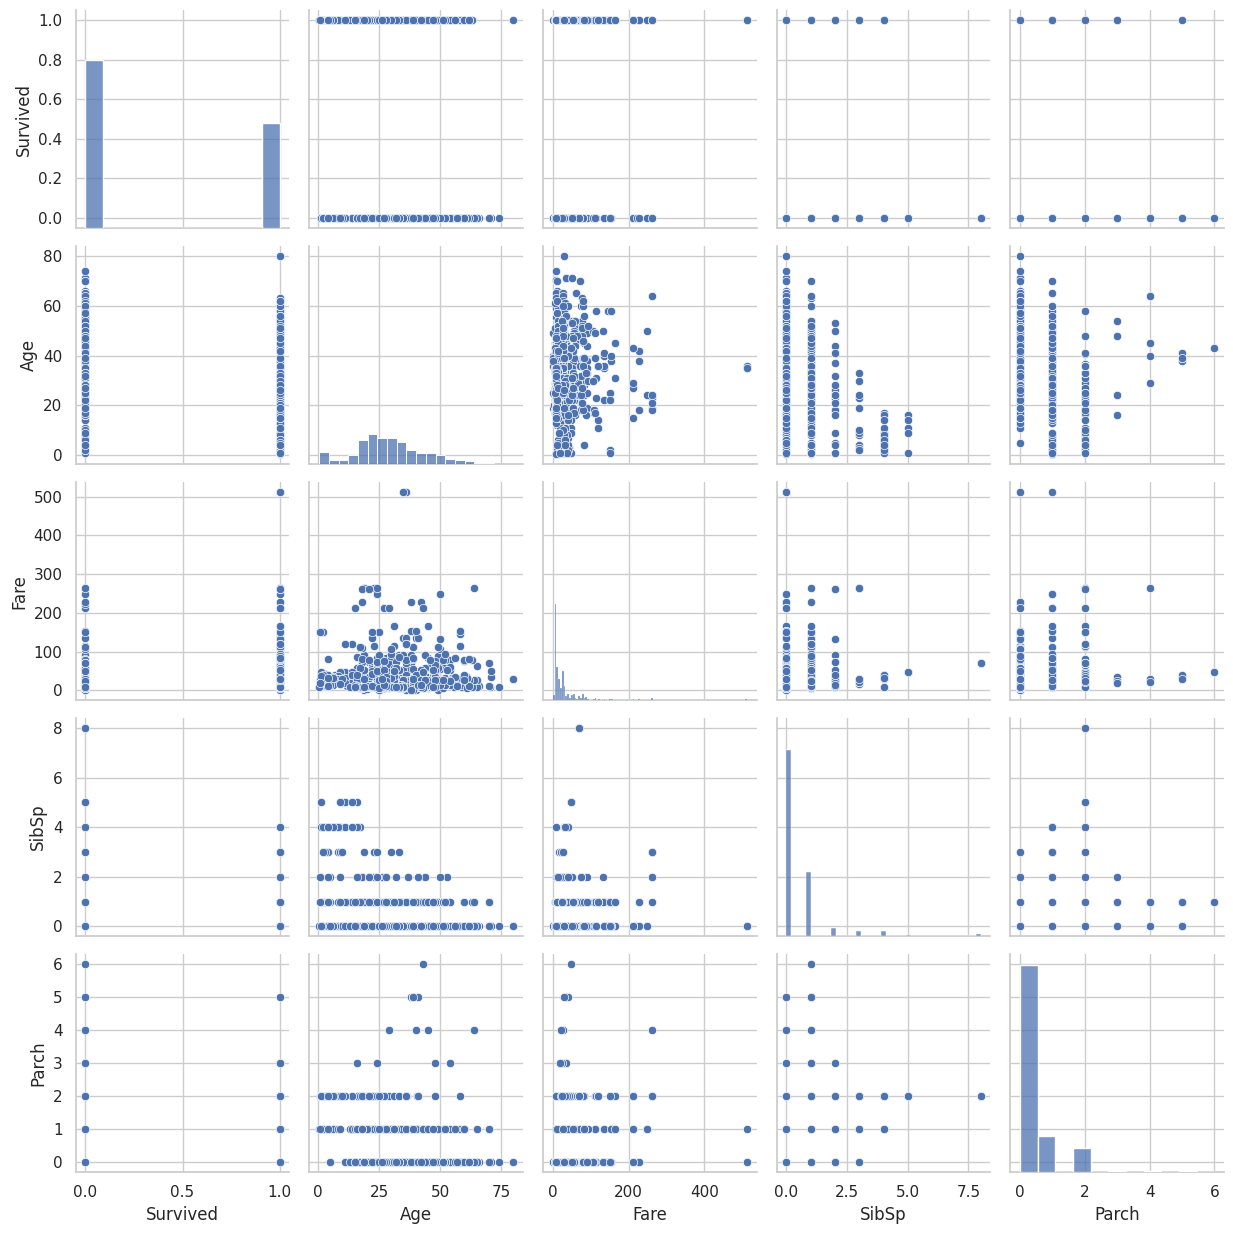

In [ ]:
# 3. Bivariate Analysis with Target

num_for_corr = ["Survived", "Age", "Fare", "SibSp", "Parch"]
## Complete this code block to generate correlation heatmap and pairplot [You need to complete]
corr_matrix=df[num_for_corr].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Corelation Heatmap")
plt.show()


sns.pairplot(df[["Survived","Age","Fare","SibSp","Parch"]])
plt.tight_layout()
plt.show()

#### Your insights
- Insight 1: From the Heatmap, we see that "Fare" is the most informative and "SibSp" is the fewest informative feature among the feature.Here Minus values indicates nagative(like no relation) and Positive values indicates positive correlation between two features.
- Insight 2:From the Heatmap,The correlation between "Survived" and "Fare" provides a positive value of 0.26 that indicates a medium relationship between the two features.On the other hand, the correlation between "Survived" and "SibSp" provides a negative value, which is 0.035, indicating a very weak relationship with both features.
- Insight 3:From pairplot,"Age", "SibSp", and "Parch" show noisy, non-linear relationships.From "Age" and "Fare" pairplot, we see, high fares are typically paid by adults. So, adults get extra opportunities. That's why we see ,the survival rate of Adults is higher than young.  

---
### 4. Categorical vs Target Analysis (5 marks)
**Tasks:**
For each of the following categorical features: `Sex`, `Pclass`, `Embarked`:
- Plot a **bar chart** showing the proportion of passengers who survived in each category.
- Write **two short insights** about which categories have higher or lower survival chances.



Survival proportion by Sex:


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


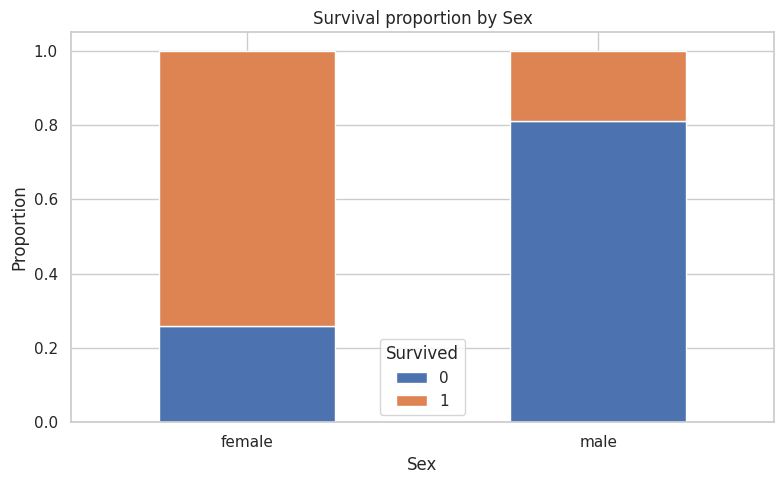


Survival proportion by Pclass:


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


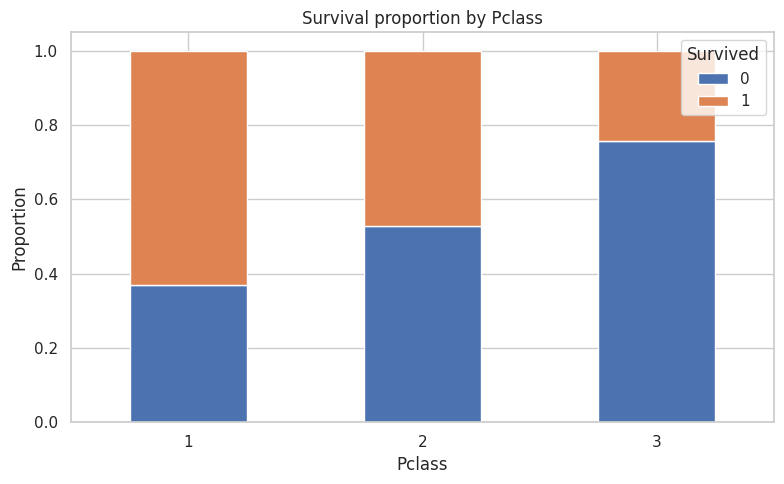


Survival proportion by Embarked:


Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


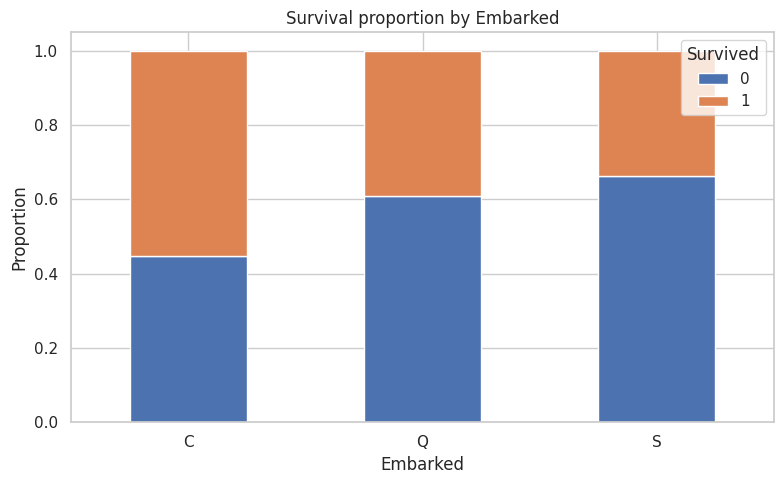

In [ ]:
# 4. Categorical vs Target Analysis [Bar chart code is written for you]

cat_target_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_target_cols:
    ct = pd.crosstab(df[c], df["Survived"], normalize="index")
    print(f"\nSurvival proportion by {c}:")
    display(ct)
    ct.plot(kind="bar", stacked=True)
    plt.title(f"Survival proportion by {c}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

#### Your insights
- Insight 1:From "Survival proportion by Sex", we see that for females, around 26% were dead and around 74% survived. On the other hand, if we look for males, only 19% survived and dead 81%.We can decide that the rescue team was set a priority to rescue women first.
- Insight 2: From "Survival proportion by Pclass", we can see that most of the passengers who came from class 1 (Rich passengers) survived. Which was around 63%.We see, only 47% survived from class 2 (middle class) and 24% from class 3(lower class). This shows a discrimination among three classes.

---
## Part B: Basic Data Preprocessing – 45 marks

Focus: **Handling missing values, encoding categorical variables, and scaling numeric features.**

### 5. Handling Missing Values (15 marks)
**Tasks:**
1. Show the count of missing values in each column.
2. Decide how to handle missing values for:
   - `Age` (numeric)
   - `Embarked` (categorical)
   - `Cabin` (many missing values)
3. Implement your chosen strategy in code.
4. Show missing value counts again to confirm.
5. Explain your choices in **3–4 sentences**.


In [ ]:
# 5. Handling Missing Values

print("Missing values before:") #[Task 1 is done for you]
print(df.isna().sum())

# Drop Cabin (Complete this code block)
df.drop("Cabin",axis=1,inplace=True)
# Fill Age (Complete this code block)
df["Age"]=df["Age"].fillna(df["Age"].median())
# Fill Embarked (Complete this code block)
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
print("\nMissing values after handling:")
print(df.isna().sum())

Missing values before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### Explanation of your strategy
- Why you dropped or kept `Cabin`: If we found atleast 30-50% value are missing from a column ,then we should drop the column.For column "Cabin" column,here around 80% values are missing.That why we drop the column.
- Why you used median/mean for `Age`:   We use the median for a right-skewed distribution(Age) because it represents the central value, which is not affected by outliers and thus reduces model bias effectively.
- Why you used mode or another method for `Embarked`:We can't calculate the mean/median   For categorical column. We can calculate number of frequency(mode).Mode provide a realistic value for categorical column.

---
### 6. Encoding Categorical Variables (15 marks)
Focus on the following categorical features:
- `Sex`
- `Embarked`
- `Pclass` (treat as categorical)

**Tasks:**
- Use `OneHotEncoder` from sklearn to encode these features.
- Keep `Survived` and the main numeric features (`Age`, `Fare`, `SibSp`, `Parch`).
- Show the shape and head of the encoded DataFrame.


In [ ]:
# 6. Encoding Categorical Variables

df_enc = df.copy()

# Select features for encoding and keep important numeric ones
cat_features = ["Sex", "Embarked", "Pclass"]
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
target_col = "Survived"

# One hot encode categorical variables [You need to do]
encoded_df = pd.get_dummies(df_enc[cat_features])
# Build final encoded DataFrame
df_model = pd.concat([
    df_enc[[target_col] + numeric_features],
    encoded_df
], axis=1)

print("Shape after encoding:", df_model.shape)
display(df_model.head())

Shape after encoding: (891, 11)


,Survived,Age,Fare,SibSp,Parch,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,3,False,True,False,False,True
1,1,38.0,71.2833,1,0,1,True,False,True,False,False
2,1,26.0,7.9250,0,0,3,True,False,False,False,True
3,1,35.0,53.1000,1,0,1,True,False,False,False,True
4,0,35.0,8.0500,0,0,3,False,True,False,False,True


---
### 7. Scaling Numeric Features (15 marks)
**Tasks:**
- Use `StandardScaler` on the numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot boxplots of these features **before** and **after** scaling.
- Write **two sentences** explaining how scaling changes the numeric values and why it is useful before training some ML models.


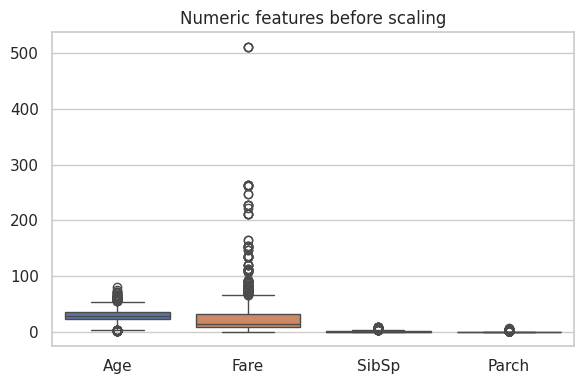

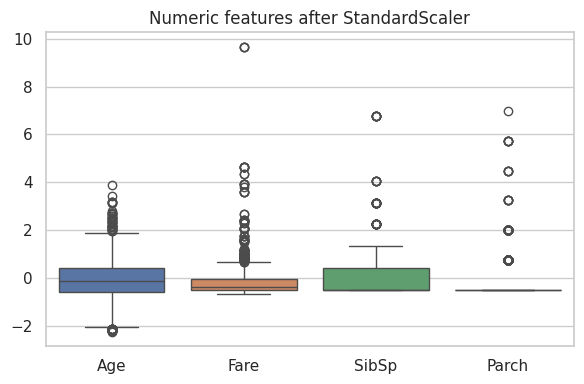

In [ ]:
# 7. Scaling Numeric Features

score_cols = ["Age", "Fare", "SibSp", "Parch"]

# Boxplot before scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_model[score_cols])
plt.title("Numeric features before scaling")
plt.tight_layout()
plt.show()

# Apply StandardScaler [You need to do]
df_scaled = df_model.copy()
scaler = StandardScaler()
df_scaled[score_cols] = scaler.fit_transform(df_scaled[score_cols])
# Boxplot after scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_scaled[score_cols])
plt.title("Numeric features after StandardScaler")
plt.tight_layout()
plt.show()

#### Your observations on scaling
- Sentence 1: StandardScaler transforms numeric features so that each feature has a mean of 0 and a standard deviation of 1, effectively putting all features on the same scale.
- Sentence 2:Scaling helps distance-based algorithms like KNN, Logistic Regression, SVM, and Neural Networks achieve faster convergence and perform better, because all features contribute equally during training.

---
### 8. Simple Feature Quality Check (5 marks)
**Tasks:**
- Show `.info()` of the final processed DataFrame (`df_scaled`).
- Confirm there are no missing values.
- Confirm that all remaining features are numeric and suitable for most ML models.
- Write **one short concluding remark** about dataset readiness.


In [ ]:
# 8. Simple Feature Quality Check
print(df_scaled.info())

print("\nTotal missing values in final DataFrame:", df_scaled.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Pclass      891 non-null    int64  
 6   Sex_female  891 non-null    bool   
 7   Sex_male    891 non-null    bool   
 8   Embarked_C  891 non-null    bool   
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
dtypes: bool(5), float64(4), int64(2)
memory usage: 46.2 KB
None

Total missing values in final DataFrame: 0


#### Final remark on dataset readiness
- Your remark: The dataset is now clean, fully numeric and free of missing values.It's fully ready for next stage.

---
## Submission
- Run all cells from top to bottom to make sure everything works.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.